# Looking at and normalizing the data

Let's start off by looking at and normalizing the data. In order to compare apples to apples, we will want to find things like:

* return mean
* return standard deviation

But the different funds have been around for varying amounts of time. Also, they don't report return rates or volatility - they report the price of the fund at various points in time. We need to take this data and transform it into what we're interested in.

In [332]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [333]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

## VGSIX

First, let's explore the VGSIX (Vanguard REIT Index Fund Investor Shares) fund.

In [334]:
vgsix = pd.read_csv('vanguard_data/fund_data/VGSIX.csv')

In [335]:
vgsix.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-09-13,28.010000,28.010000,28.010000,28.010000,0,28.010000
1,2016-09-12,28.740000,28.740000,28.740000,28.740000,0,28.740000
2,2016-09-09,28.600000,28.600000,28.600000,28.600000,0,28.600000
3,2016-09-08,29.760000,29.760000,29.760000,29.760000,0,29.760000
4,2016-09-07,30.139999,30.139999,30.139999,30.139999,0,30.139999


### We need to reverse it so that we've going from old to new

In [336]:
vgsix = vgsix[::-1]
vgsix.index = range(4200+1)
vgsix.head(20)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-01-03,9.76,9.76,9.76,9.76,0,4.252948
1,2000-01-04,9.68,9.68,9.68,9.68,0,4.218088
2,2000-01-05,9.71,9.71,9.71,9.71,0,4.231160
3,2000-01-06,9.87,9.87,9.87,9.87,0,4.300880
4,2000-01-07,10.09,10.09,10.09,10.09,0,4.396746
5,2000-01-10,10.21,10.21,10.21,10.21,0,4.449037
6,2000-01-11,10.17,10.17,10.17,10.17,0,4.431606
7,2000-01-12,10.12,10.12,10.12,10.12,0,4.409819
8,2000-01-13,10.11,10.11,10.11,10.11,0,4.405461
9,2000-01-14,10.09,10.09,10.09,10.09,0,4.396746


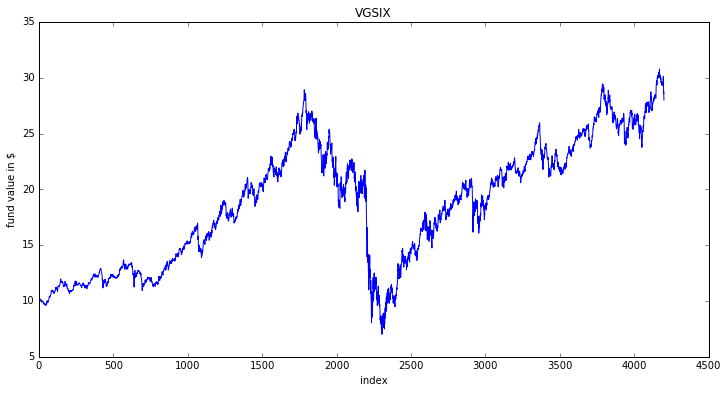

In [337]:
setup_graph(title='VGSIX', x_label='index', y_label='fund value in $', fig_size=(12,6))
plt.plot(vgsix['Close'])

### Let's convert the dates to datetimes so we can graph with vgsix['Date'] as x

In [338]:
vgsix['Date'] = pd.to_datetime(vgsix['Date'])

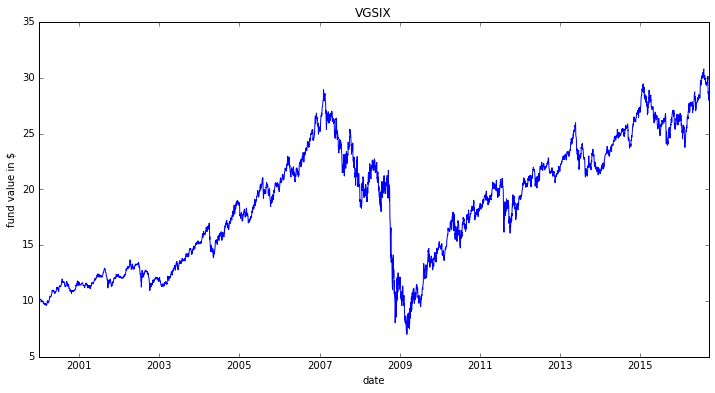

In [339]:
setup_graph(title='VGSIX', x_label='date', y_label='fund value in $', fig_size=(12,6))
plt.plot(vgsix['Date'], vgsix['Close'])

In [340]:
vgsix.ix[0]['Date'].month

1

In [341]:
def get_value_at_beginning_of_each_month(fund):
    month_values = []
    current_month = -1
    for row_num in range(len(fund)):
        row = fund.ix[row_num]
        if row['Date'].month == current_month:
            continue
        current_month = row['Date'].month
        month_values.append([row['Date'], row['Close']])
    return pd.DataFrame(month_values, columns=['Date', 'Value'])

In [342]:
vgsix_month_values = get_value_at_beginning_of_each_month(vgsix)

In [343]:
vgsix_month_values.head()

,Date,Value
0,2000-01-03,9.76
1,2000-02-01,9.97
2,2000-03-01,9.71
3,2000-04-03,9.96
4,2000-05-01,10.81


### Find difference between values

If the value from one month to the next goes from `$`100 to `$`105 in a month, that's a 5% gain. If it goes from `$`100 to `$`95, that's a 5% loss.

* 100 / 105 = 0.95 -> 1 - 0.95 = 0.05
* 105 / 100 = 1.05 -> 1 - 1.05 = -0.05

In [344]:
test_values = [100, 105, 100, 110, 100, 120, 100, 150, 100]

def get_return_between_dates(fund_values_by_month):
    returns = [0]
    for i in range(1, len(fund_values_by_month)):
        return_percent = 100 * ((fund_values_by_month[i] / fund_values_by_month[i-1]) - 1)
        returns.append(return_percent)
    return returns

get_return_between_dates(test_values)

[0,
 5.000000000000004,
 -4.761904761904767,
 10.000000000000009,
 -9.090909090909093,
 19.999999999999996,
 -16.666666666666664,
 50.0,
 -33.333333333333336]

In [345]:
vgsix_returns_by_month = get_return_between_dates(vgsix_month_values['Value'])

vgsix_month_values['Return'] = pd.Series(vgsix_returns_by_month)
vgsix_month_values.head()

,Date,Value,Return
0,2000-01-03,9.76,0.000000
1,2000-02-01,9.97,2.151639
2,2000-03-01,9.71,-2.607823
3,2000-04-03,9.96,2.574665
4,2000-05-01,10.81,8.534137


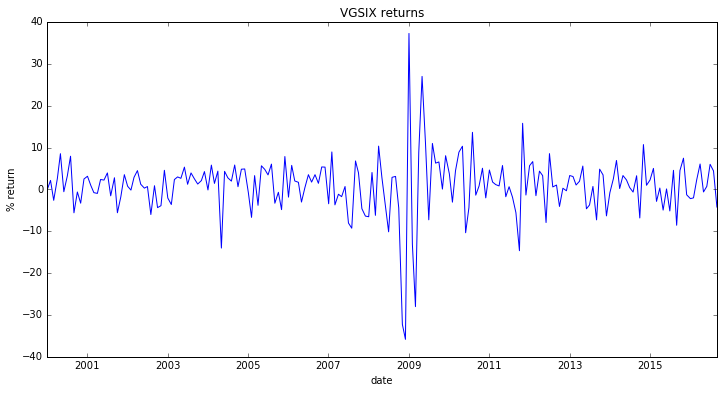

In [390]:
setup_graph(title='VGSIX returns', x_label='date', y_label='% return', fig_size=(12,6))
plt.plot(vgsix_month_values['Date'], vgsix_month_values['Return'])

Note that you can clearly see the huge volatility at the point in the graph that corresponds to the 2008 crash. Considering this is a Real Estate Investment Trust, a huge hit is what we would expect in a housing crisis.

### Mean returns

Now let's calculate the mean returns. Since our data in on a month resolution, we'll first calculate the mean monthly return, and we can then multiply that by 12 to get the mean yearly return.

In [347]:
mean_returns_per_month = np.mean(vgsix_returns_by_month)
mean_returns_per_month

0.817350716452802

In [348]:
mean_returns_per_year = mean_returns_per_month * 12
mean_returns_per_year

9.8082085974336231

Cool, so an average of 9.86% returns. Not bad.

### Standard deviation of returns

To compare expected returns with volatility, we'll keep data in the month resulution. So we'll look at mean and standard deviation of returns by month.

In [349]:
np.std(vgsix_returns_by_month)

7.0915601170713121

### Histogram

Let's look at the data as a histogram

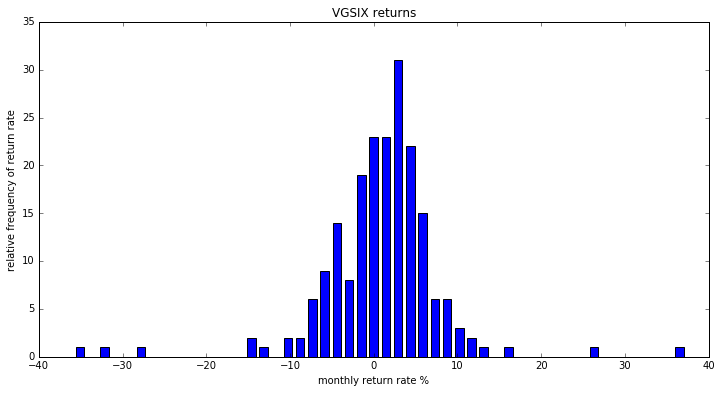

In [350]:
hist, bins = np.histogram(vgsix_returns_by_month, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
setup_graph(title='VGSIX returns', x_label='monthly return rate %', y_label='relative frequency of return rate', fig_size=(12,6))
plt.bar(center, hist, align='center', width=width)
plt.show()

### Over vs Under

Another way to look at investments is to see the ratio of gains / losses. We'll again do this on a month basis.

In [351]:
gains = [ret for ret in vgsix_returns_by_month if ret > 0]
losses = [ret for ret in vgsix_returns_by_month if ret <= 0]
print('# gains = {}, # losses = {}'.format(len(gains), len(losses)))
len(gains) / len(losses)

# gains = 126, # losses = 75


1.68

In [352]:
# Let's make a function so this is easier to do in the future

def gains_to_losses_ratio(fund_returns):
    gains = [ret for ret in fund_returns if ret > 0]
    losses = [ret for ret in fund_returns if ret <= 0]
    return len(gains) / len(losses)

gains_to_losses_ratio(vgsix_returns_by_month)

1.68

# Generalize

Now that we've explored the data and figured out how to analyze it, let's analyze another one, and write some functions to make it even easier to analyze various funds.

The data we really care about are:
* Date
* Value each month
* Returns each month
* Mean returns
* Standard deviation of returns
* Ratio of gains/losses

Let's write a few functions to help us easily compute this data...

In [389]:
def get_normalized_data(raw_fund_data_path):
    """ Given the path (like 'vanguard_data/fund_data/VGSIX.csv') to the raw Vanguard CSV data,
    return a cleaned up data frame. """
    # Read in the raw data
    fund_data_frame = pd.read_csv(raw_fund_data_path)
    
    # Reverse so that we're going in chronological order
    fund_data_frame = fund_data_frame[::-1]
    fund_data_frame.index = range(len(fund_data_frame))
    
    # Convert date strings to datetime objects
    fund_data_frame['Date'] = pd.to_datetime(fund_data_frame['Date'])
    
    # Since we're doing our analysis on a month-by-month basis, pull out one data point per month
    fund_by_month = get_value_at_beginning_of_each_month(fund_data_frame)
    
    # Get returns by looking at the value between months
    returns_by_month = get_return_between_dates(fund_by_month['Value'])

    # Add the returns to our fund_by_month DataFrame
    fund_by_month['Return'] = pd.Series(returns_by_month)
    
    # Return this lovely piece of DataFrame for our analytical pleasure
    return fund_by_month

In [354]:
def get_interesting_stats(fund_by_month):
    """ Given the fund_by_month DataFrame, return some interesting stats. """
    years_analyzed = len(set([d.year for d in fund_by_month['Date']]))
    total_return = 100 * ((fund_by_month['Value'].iloc[-1] / fund_by_month['Value'].iloc[0]) - 1)
    return_mean = np.mean(fund_by_month['Return'])
    return {
        'return_mean': return_mean,
        'return_std': np.std(fund_by_month['Return']),
        'return_max': max(fund_by_month['Return']),
        'return_min': min(fund_by_month['Return']),
        'total_return': total_return,
        'gain_to_loss': gains_to_losses_ratio(fund_by_month['Return']),
        'years_analyzed': years_analyzed,
        'avg_return_per_year': total_return / years_analyzed
    }

## VWUSX

Let's now use our general functions for analyzing the VWUSX (Vanguard U.S Growth Portfolio Fund Investor Shares) fund.

In [355]:
vwusx = get_normalized_data('vanguard_data/fund_data/VWUSX.csv')
vwusx.head()

,Date,Value,Return
0,2000-01-03,43.560001,0.000000
1,2000-02-01,41.790001,-4.063361
2,2000-03-01,42.240002,1.076815
3,2000-04-03,45.209999,7.031243
4,2000-05-01,44.779999,-0.951117


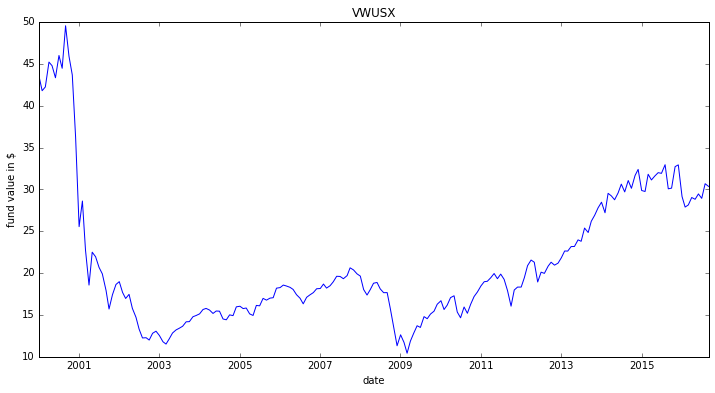

In [356]:
setup_graph(title='VWUSX', x_label='date', y_label='fund value in $', fig_size=(12,6))
plt.plot(vwusx['Date'], vwusx['Value'])

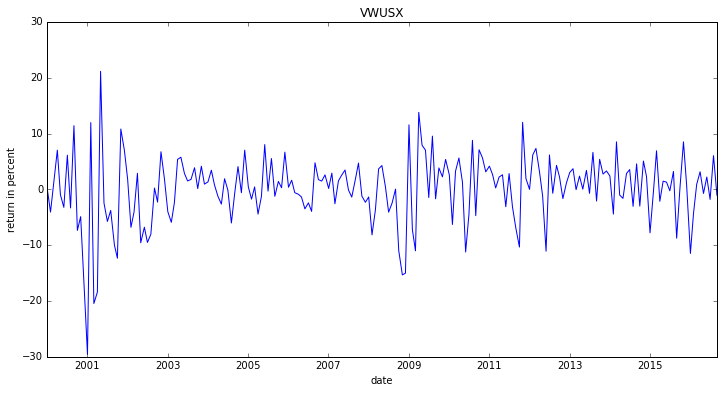

In [366]:
setup_graph(title='VWUSX', x_label='date', y_label='return in percent', fig_size=(12,6))
plt.plot(vwusx['Date'], vwusx['Return'])

In [358]:
get_interesting_stats(vwusx)

{'avg_return_per_year': -1.7825311533746158,
 'gain_to_loss': 1.2087912087912087,
 'return_max': 21.163166397415178,
 'return_mean': 0.021789639240983733,
 'return_min': -29.556109732561353,
 'return_std': 6.1979660613157144,
 'total_return': -30.303029607368469,
 'years_analyzed': 17}

It's interesting to note that the mean return (per month) is very near 0%, even though the this particular fund, in the period considered, actually lost money. You can also see a couple intersting numbers like the largest loss in a single month was 29.6% and the largest gain in one month was 21.2%.

# Comparing funds

Now that we have some powerful tools for analyzing funds, let's compare all of Vanguards funds!

In [359]:
import os
all_funds = [name.split('.')[0] for name in os.listdir('vanguard_data/fund_data')]
all_funds[0:10]

['NAESX',
 'VAIPX',
 'VASGX',
 'VASIX',
 'VASVX',
 'VBAIX',
 'VBIAX',
 'VBIIX',
 'VBILX',
 'VBIMX']

In [360]:
def get_fund_stats(fund_name):
    csv_path = 'vanguard_data/fund_data/{}.csv'.format(fund_name)
    print('Analyzing {}'.format(fund_name))
    return get_interesting_stats(get_normalized_data(csv_path))

all_fund_stats = [dict(get_fund_stats(fund_name), **{'fund': fund_name}) for fund_name in all_funds]

Analyzing NAESX
Analyzing VAIPX
Analyzing VASGX
Analyzing VASIX
Analyzing VASVX
Analyzing VBAIX
Analyzing VBIAX
Analyzing VBIIX
Analyzing VBILX
Analyzing VBIMX
Analyzing VBINX
Analyzing VBIPX
Analyzing VBIRX
Analyzing VBISX
Analyzing VBITX
Analyzing VBIUX
Analyzing VBLIX
Analyzing VBLLX
Analyzing VBLTX
Analyzing VBMFX
Analyzing VBMPX
Analyzing VBTIX
Analyzing VBTLX
Analyzing VCADX
Analyzing VCAIX
Analyzing VCDAX
Analyzing VCITX
Analyzing VCLAX
Analyzing VCOBX
Analyzing VCORX
Analyzing VCSAX
Analyzing VCVLX
Analyzing VCVSX
Analyzing VDADX
Analyzing VDAIX
Analyzing VDEQX
Analyzing VDIGX
Analyzing VDIPX
Analyzing VDVIX
Analyzing VEIEX
Analyzing VEIPX
Analyzing VEIRX
Analyzing VEMAX
Analyzing VEMIX
Analyzing VEMPX
Analyzing VEMRX
Analyzing VENAX
Analyzing VESIX
Analyzing VEUPX
Analyzing VEURX
Analyzing VEUSX
Analyzing VEVFX
Analyzing VEXAX
Analyzing VEXMX
Analyzing VEXPX
Analyzing VEXRX
Analyzing VFAIX
Analyzing VFFVX
Analyzing VFIAX
Analyzing VFICX
Analyzing VFIDX
Analyzing VFIFX
Analyzin

In [361]:
all_fund_stats_frame = pd.DataFrame(all_fund_stats,
                                    columns=['fund',
                                             'total_return',
                                             'return_mean',
                                             'return_std',
                                             'return_min',
                                             'return_max',
                                             'gain_to_loss',
                                             'years_analyzed',
                                             'avg_return_per_year'])
all_fund_stats_frame

,fund,total_return,return_mean,return_std,return_min,return_max,gain_to_loss,years_analyzed,avg_return_per_year
0,NAESX,151.979350,0.666214,6.355511,-21.614346,18.878724,1.392857,17,8.939962
1,VAIPX,7.600000,0.071721,1.879819,-8.829742,5.567831,1.092308,12,0.633333
2,VASGX,35.633804,0.240230,4.174179,-16.327538,14.519906,1.310345,17,2.096106
3,VASIX,20.532915,0.103813,1.468537,-6.682028,4.195804,1.451220,17,1.207819
4,VASVX,182.613158,0.651559,5.133525,-18.390052,16.608187,1.544304,17,10.741950
5,VBAIX,63.598106,0.301773,2.943474,-11.355311,9.148045,1.546667,17,3.741065
6,VBIAX,60.309278,0.291195,2.946363,-11.355311,9.148045,1.513158,17,3.547605
7,VBIIX,25.369979,0.123675,1.490991,-5.286738,6.092437,1.138298,17,1.492352
8,VBILX,11.361502,0.071761,1.523916,-5.286738,6.092437,1.057471,16,0.710094
9,VBIMX,15.257532,0.120518,1.441607,-4.513541,6.092437,1.047619,11,1.387048


### Highest average return per year

This is calculated by finding the total return over the years analyzed (by looking at the first and last values) divided by the number of years analyzed.

In [362]:
all_fund_stats_frame.sort_values(by=['avg_return_per_year'], ascending=False)

,fund,total_return,return_mean,return_std,return_min,return_max,gain_to_loss,years_analyzed,avg_return_per_year
208,VSGNX,149.198557,1.384072,5.013611,-12.736475,16.782355,1.807692,7,21.314080
219,VSPGX,137.721914,1.259305,3.636373,-8.670699,10.647241,2.041667,7,19.674559
217,VSMSX,125.580002,1.248629,5.063767,-12.930589,16.858847,1.920000,7,17.940000
247,VTSIX,301.614189,0.876323,5.987202,-21.172127,18.620221,1.544304,17,17.742011
242,VTMSX,300.726408,0.875520,5.992131,-21.216931,18.737408,1.544304,17,17.689789
218,VSMVX,123.080774,1.240470,5.209507,-13.108848,17.024142,1.703704,7,17.582968
152,VMFGX,118.636947,1.186614,4.667996,-13.234191,15.907564,2.041667,7,16.948135
220,VSPMX,109.799428,1.129309,4.664454,-13.314722,16.144943,1.807692,7,15.685633
167,VMVAX,93.839996,1.170860,4.007559,-10.020175,13.492413,1.772727,6,15.639999
190,VRTGX,106.716568,1.160204,5.664324,-14.441762,18.218924,1.607143,7,15.245224


### Highest mean return

This is calculated a bit different than the above: in this case, we take the monthly mean return and multiply by 12.

In [363]:
all_fund_stats_frame['return_mean_per_year'] = all_fund_stats_frame['return_mean'] * 12
all_fund_stats_frame.sort_values(by=['return_mean_per_year'], ascending=False)

,fund,total_return,return_mean,return_std,return_min,return_max,gain_to_loss,years_analyzed,avg_return_per_year,return_mean_per_year
208,VSGNX,149.198557,1.384072,5.013611,-12.736475,16.782355,1.807692,7,21.314080,16.608859
219,VSPGX,137.721914,1.259305,3.636373,-8.670699,10.647241,2.041667,7,19.674559,15.111657
217,VSMSX,125.580002,1.248629,5.063767,-12.930589,16.858847,1.920000,7,17.940000,14.983552
218,VSMVX,123.080774,1.240470,5.209507,-13.108848,17.024142,1.703704,7,17.582968,14.885646
103,VIAAX,8.600872,1.195500,1.407181,-1.225667,2.774475,2.500000,1,8.600872,14.345997
104,VIAIX,8.570048,1.191406,1.407892,-1.226461,2.764761,2.500000,1,8.570048,14.296875
152,VMFGX,118.636947,1.186614,4.667996,-13.234191,15.907564,2.041667,7,16.948135,14.239362
209,VSIAX,90.440004,1.171158,4.704253,-9.280000,16.005287,1.652174,6,15.073334,14.053892
167,VMVAX,93.839996,1.170860,4.007559,-10.020175,13.492413,1.772727,6,15.639999,14.050322
190,VRTGX,106.716568,1.160204,5.664324,-14.441762,18.218924,1.607143,7,15.245224,13.922451


### Best Gain:Loss ratio

In [364]:
all_fund_stats_frame.sort_values(by=['gain_to_loss'], ascending=False)

,fund,total_return,return_mean,return_std,return_min,return_max,gain_to_loss,years_analyzed,avg_return_per_year,return_mean_per_year
28,VCOBX,2.594800,0.368946,0.685165,0.000000,2.037773,6.000000,1,2.594800,4.427354
124,VIRTX,4.118533,0.264017,1.508747,-3.393213,2.729150,3.000000,2,2.059267,3.168207
134,VITVX,3.780242,0.252440,2.005886,-4.609209,3.930818,3.000000,2,1.890121,3.029277
29,VCORX,2.594810,0.369079,0.704390,0.000000,2.087475,2.500000,1,2.594810,4.428945
104,VIAIX,8.570048,1.191406,1.407892,-1.226461,2.764761,2.500000,1,8.570048,14.296875
103,VIAAX,8.600872,1.195500,1.407181,-1.225667,2.774475,2.500000,1,8.600872,14.345997
229,VTEAX,5.213027,0.364825,0.488693,-0.332709,1.593443,2.500000,2,2.606514,4.377897
230,VTEBX,5.315948,0.371741,0.469100,-0.292398,1.544402,2.500000,2,2.657974,4.460892
194,VRVIX,82.838448,0.905318,3.869709,-9.846872,11.599657,2.476190,7,11.834064,10.863821
221,VSPVX,100.963163,1.037963,3.920418,-9.794057,11.359422,2.318182,7,14.423309,12.455552


### Least volatile

In [365]:
all_fund_stats_frame.sort_values(by=['return_std'], ascending=True)

,fund,total_return,return_mean,return_std,return_min,return_max,gain_to_loss,years_analyzed,avg_return_per_year,return_mean_per_year
261,VUSFX,0.050000,0.002536,0.085902,-0.100140,0.200005,0.428571,2,0.025000,0.030435
259,VUBFX,0.100000,0.005045,0.097415,-0.200000,0.200602,0.333333,2,0.050000,0.060541
287,VWSUX,1.149425,0.006287,0.203787,-0.762873,0.829082,0.880000,16,0.071839,0.075443
286,VWSTX,2.590674,0.012939,0.206604,-0.762873,0.829082,0.896226,17,0.152393,0.155268
198,VSBSX,1.899045,0.022903,0.216683,-0.598499,0.589966,0.930233,8,0.237381,0.274833
195,VSBIX,2.399044,0.028804,0.217624,-0.558655,0.561794,0.976190,8,0.299881,0.345643
11,VBIPX,-0.750469,-0.011745,0.347375,-0.662879,0.854701,0.794118,6,-0.125078,-0.140944
14,VBITX,-0.750469,-0.011745,0.347375,-0.662879,0.854701,0.794118,6,-0.125078,-0.140944
230,VTEBX,5.315948,0.371741,0.469100,-0.292398,1.544402,2.500000,2,2.657974,4.460892
229,VTEAX,5.213027,0.364825,0.488693,-0.332709,1.593443,2.500000,2,2.606514,4.377897


# How does volatility change expected returns?

Let's look at the Vanguard fund data to determine the relationship between volatility and mean return.

#### Let's look at the data the other direction: mean return -> std dev return

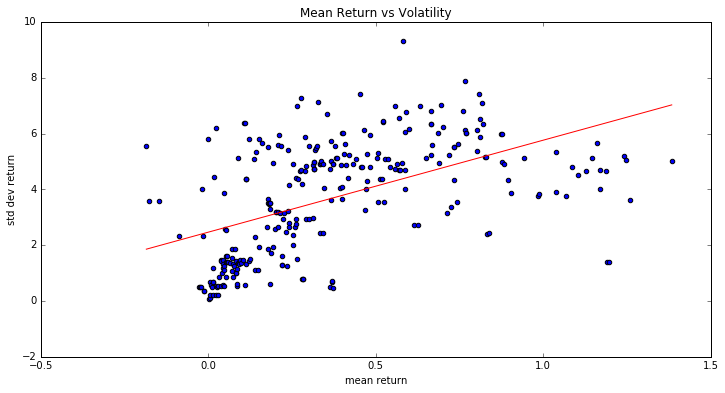

In [394]:
by_mean = all_fund_stats_frame.sort_values(by=['return_mean'], ascending=True)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(by_mean['return_mean'], by_mean['return_std'])

def investment_mean_to_std(mean):
    return slope * mean + intercept

setup_graph(title='Mean Return vs Volatility', x_label='mean return', y_label='std dev return', fig_size=(12,6))
plt.scatter(by_mean['return_mean'], by_mean['return_std'])
plt.plot(by_mean['return_mean'], investment_std_to_mean(by_mean['return_mean']), color='red')
plt.show()

In [401]:
slope

3.2955407720697272

In [402]:
intercept

2.4677939920687453

### Example mean -> std devs

These numbers are higher than I expected. I wouldn't think the standard deviation at 4% mean return would be like 16%.

In [395]:
investment_mean_to_std(8)

28.832120168626563

In [396]:
investment_mean_to_std(6)

22.241038624487107

In [397]:
investment_mean_to_std(4)

15.649957080347654

# Mean return to volatility ratio

Looking at the relationship between mean return and volatility made me think that another intersting metric by which to judge mutual funds might be the ratio of mean return to volatility (return_mean / return_std).

In [409]:
all_fund_stats_frame['ret_to_vol'] = all_fund_stats_frame['return_mean'] / all_fund_stats_frame['return_std']
all_fund_stats_frame.sort_values(by=['ret_to_vol'], ascending=False).rename(columns={'years_analyzed': 'y', 'avg_return_per_year': 'avg_per_y'})

,fund,total_return,return_mean,return_std,return_min,return_max,gain_to_loss,y,avg_per_y,return_mean_per_year,ret_to_vol
103,VIAAX,8.600872,1.195500,1.407181,-1.225667,2.774475,2.500000,1,8.600872,14.345997,0.849571
104,VIAIX,8.570048,1.191406,1.407892,-1.226461,2.764761,2.500000,1,8.570048,14.296875,0.846234
230,VTEBX,5.315948,0.371741,0.469100,-0.292398,1.544402,2.500000,2,2.657974,4.460892,0.792455
229,VTEAX,5.213027,0.364825,0.488693,-0.332709,1.593443,2.500000,2,2.606514,4.377897,0.746532
28,VCOBX,2.594800,0.368946,0.685165,0.000000,2.037773,6.000000,1,2.594800,4.427354,0.538478
29,VCORX,2.594810,0.369079,0.704390,0.000000,2.087475,2.500000,1,2.594810,4.428945,0.523969
234,VTIBX,11.700000,0.280042,0.780452,-1.603774,2.012809,1.857143,4,2.925000,3.360505,0.358820
224,VTABX,11.805903,0.282506,0.791775,-1.604535,2.059492,1.857143,4,2.951476,3.390072,0.356801
235,VTIFX,11.803931,0.282499,0.796508,-1.603767,2.104948,1.857143,4,2.950983,3.389988,0.354672
112,VIHIX,5.754712,0.831002,2.395668,-2.339440,4.447556,1.333333,1,5.754712,9.972025,0.346877
